### Reference:
- The final project: https://classroom.udacity.com/courses/ud257/lessons/4126079196/concepts/42072285530923
- The project instructions: https://docs.google.com/document/u/1/d/1aCquhIqsUApgsxQ8-SQBAigFDcfWVVohLEXcV6jWbdI/pub?embedded=True
- The template format: https://docs.google.com/document/d/16OX2KDSHI9mSCriyGIATpRGscIW2JmByMd0ITqKYvNg/edit
- The final project results: https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0
- The online calculator "Sample size": http://www.evanmiller.org/ab-testing/sample-size.html
- The online calculator "Sign and binomial test": http://graphpad.com/quickcalcs/binomial1.cfm
- Binomial distribution visualisation: http://databits.io/bits/fbmx-binomial-distribution
- Simple interactive statistical analysis: http://www.quantitativeskills.com/sisa/calculations/bonhlp.htm

### Experiment Overview

At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.


The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.



<img src="Final Project_ Experiment Screenshot.png">

### Metric Choice
Which of the following metrics would you choose to measure for this experiment and why? For each metric you choose, indicate whether you would use it as an invariant metric or an evaluation metric. The practical significance boundary for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.


Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.


- Number of cookies: That is, number of unique cookies to view the course overview page. (dmin=3000)
- Number of user-ids: That is, number of users who enroll in the free trial. (dmin=50)
- Number of clicks: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
- Click-through-probability: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
- Gross conversion: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
- Retention: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
- Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

You should also decide now what results you will be looking for in order to launch the experiment. Would a change in any one of your evaluation metrics be sufficient? Would you want to see multiple metrics all move or not move at the same time in order to launch? This decision will inform your choices while designing the experiment.

In [1]:
import pandas as pd

In [2]:
control = pd.read_csv('Control.csv')

In [3]:
exp = pd.read_csv('Experiment.csv')

In [12]:
baseline = pd.read_csv('baseline_values.csv')
baseline['Baseline'] =  round(baseline['Baseline'],4)

In [13]:
baseline

,Metrics,Baseline
0,Unique cookies to view course overview page pe...,40000.0000
1,"Unique cookies to click ""Start free trial"" per...",3200.0000
2,Enrollments per day:,660.0000
3,"Click-through-probability on ""Start free trial"":",0.0800
4,"Probability of enrolling, given click:",0.2062
5,"Probability of payment, given enroll:",0.5300
6,"Probability of payment, given click",0.1093


### Invariant Metrics

- Number of cookies
- Number of clicks 
- Click through probability

### Evaluation Metrics

- Gross Conversion
- Retention
- Net Conversion

### The goals of the experiment in the practical meaning:

- the number of payments should not be decreased
- the number of students who were disappointed and had not paid because they could not study enough time should be reduced.

### The goals of the experiment in terms of our metrics:

- the gross conversion should significantly decrease
- the retention should significantly increase
- the net conversion should not decrease.

### An important remark: 
- the number of user-ids is neither a good invariant metric nor a good evaluation metric.

- From one side, the new pop-up message is likely to decrease the total number of user-ids who enrolled in the free trial, so it is not invariant; from the other side it is not normalized, the number of visitors may be different between the experiment and control groups, so it is not good for evaluation.

### Measuring Variability

For each metric you selected as an evaluation metric, estimate its standard deviation analytically. Do you expect the analytic estimates to be accurate? That is, for which metrics, if any, would you want to collect an empirical estimate of the variability if you had time?

Once we collected these estimates, we should estimate the standard deviation of a metric, this is computed for sample size calculations and confidence intervals for our results. The more variant a metric is, the harder it is to reach a significant result. 

Assuming a sample size of 5,000 cookies visiting the course overview page per day (as given in project's instructions) - we want to estimate a standard deviation, for the evaluation metrics only. The sample size we are considering should be smaller than the "population" we collected and small enough to have two groups with that size.

I would like to expect the analytical variance is close to the empirical variance for the gross conversion and for the net conversion: the denominator for these two indicators is the number of clicks, which is also the unit of diversion.

And it would be useful to collect an empirical estimate of the variability for the retention: the unit of diversion was not used in this case, the empirical variance of the retention is more likely to be higher than the analytical variance.


In [21]:
cookies = 5000
print("Number of cookies = ", cookies)
print("Number of clicks = ", cookies*0.08)
print("Number of enrollment (retention) = ", cookies*0.08*0.2062)

Number of cookies =  5000
Number of clicks =  400.0
Number of enrollment (retention) =  82.48


In [22]:
import math

print("Standard Deviation of Gross Conversion = ", round(math.sqrt((0.2062*(1-0.2062))/400),4))
print("Standard Deviation of Retention = ", round(math.sqrt((0.53*(1-0.53))/82.48),4))
print("Standard Deviation of Net Conversion = ", round(math.sqrt((0.1093*(1-0.1093))/400),4))

Standard Deviation of Gross Conversion =  0.0202
Standard Deviation of Retention =  0.055
Standard Deviation of Net Conversion =  0.0156


- **Gross Conversion** - The baseline probability for Gross Conversion can be calculated by the number of users to enroll in a free trial divided by the number of cookies clicking the free trial. In other words, the probability of enrollment given a click. In this case, the unit of diversion (Cookies), that is the element by which we differentiate samples and assign them to control and experiment groups, is equall to the unit of analysis (cookies who click), that is the denominator of the formula to calculate Gross Conversion (GC). When this is the case, this analytic estimate of variance is sufficient.

- **Retention** - The baseline probability for retention is the number of paying users (enrolled after 14 free days) divided by the number of total enrolled users. In other words, the probability of payment, given enrollment. The sample size is the number of enrolled users. In this case, unit of diversion is not equal to unit of analysis (users who enrolled) so an analytical estimation is not enough - if we had the data for these estimates, we would want to estimate this variance empirically as well.

- **Net Conversion** - The baseline probability for the net conversion is the number of paying users divided by the number of cookies that clicked the free trial button. In other words, the probability of payment, given a click. The sample size is the number of cookies that clicked. In this case, the unit of analysis and diversion are equal so we expect a good enough estimation analytically.

### Sizing

#### Choosing Number of Samples given Power
Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric.

Refer to the online calculator "Sample size": http://www.evanmiller.org/ab-testing/sample-size.html

#### Gross Conversion Sizing
<img src="sample_size_gross_conversion.png">

#### Retention Sizing
<img src="sample_size_retention.png">

#### Net Conversion Sizing
<img src="sample_size_net_conversion.png">

In [27]:
# Supporting calculation for the control and experimental groups
print ("Gross conversion: 2 × 25835 × 40000 ÷ 3200 = ", (2 * 25835) / (3200/40000))
print ("Retention:  2 × 39115 × 40000 ÷ 660 = ", round((2 * 39115)/ (660/40000),2))
print ("Net conversion: 2 × 27411 × 40000 ÷ 3200 = ", (2 * 27411) / (3200/40000))

Gross conversion: 2 × 25835 × 40000 ÷ 3200 =  645875.0
Retention:  2 × 39115 × 40000 ÷ 660 =  4741212.12
Net conversion: 2 × 27411 × 40000 ÷ 3200 =  685275.0


### Choosing Duration vs. Exposure

What percentage of Udacity's traffic would you divert to this experiment (assuming there were no other experiments you wanted to run simultaneously)? Is the change risky enough that you wouldn't want to run on all traffic?


Given the percentage you chose, how long would the experiment take to run, using the analytic estimates of variance? If the answer is longer than a few weeks, then this is unreasonably long, and you should reconsider an earlier decision.

In [28]:
# Supporting calculation for the number of days

print ("Number of pageviews according to gross conversion: 645,875")
print ("Days (100% of the traffic) = 645,875 ÷ 40000 = ", 645875 / 40000)

print ("Number of pageviews according to retention: 4,741,212")
print ("Days (100% of the traffic) = 4,741,212 ÷ 40,000 = ", 4741212 / 40000)

print ("Number of pageviews according to net conversion: 685,275")
print ("Days (100% of the traffic) = 685,275 ÷ 40000 = ", 685325 / 40000.0)


Number of pageviews according to gross conversion: 645,875
Days (100% of the traffic) = 645,875 ÷ 40000 =  16.146875
Number of pageviews according to retention: 4,741,212
Days (100% of the traffic) = 4,741,212 ÷ 40,000 =  118.5303
Number of pageviews according to net conversion: 685,275
Days (100% of the traffic) = 685,275 ÷ 40000 =  17.133125


Even the use of 100 percent of the traffic does not allow testing in full for all three metrics (the gross conversion, the retention, and the net conversion). It turns out that we need to experiment 118 days. Of course, it is too long for tasks staged in the project. Percent reduction in traffic will increase this interval. Hence, it is necessary to reduce the number of test metrics and choose only two of them: the gross conversion and the net conversion.

I should reconsider an earlier decision about 4741212 needed pageviews and setup the number of pageviews equal to 685325. For the experiment with the gross conversion and the net conversion, we can use the period 17 days with the 100% traffic level. This interval is much better, but it gives us the result within 2 week of business cycle.

It is also possible to take into consideration that the commercial risk is low: the site offers students to better plan and to evaluate their training time. The assumption of a sharp decrease in payments as a result of the pilot warning is devoid of practical foundation. For investments, the decisive factor is the first free period as a way to assess their own abilities, and it does not change during the experiment. The number of payments theoretically may slightly decrease due to the lower number of subscriptions, but this is only an assumption. Students who spend less than 5 hours a week are hardly able to complete the program successfully. In most cases, we are talking about reducing the waste of time for students and mentors.

And there is no risk in terms of privacy violation at all. Users do not enter any additional information about themselves in the process of the experiment except a little piece of information about planning.

It should be noted that the use of the fraction 0.6 does not affect the commercial interests seriously. From one side, the time interval and therefore the risk will increase. From another side, we keep the certain number of pageviews, therefore the experimental audience and the risk will not increase. It means our experiment could not practically be risky for the business.

Removing one indicator in the main part of the project, I want to analyze the experimental data in the last section on my own initiative a little bit wider and to determine what happens to the metrics "Retention" as the most interesting in terms of the psychological effect and the most unpredictable.

### Analysis

This data contains the raw information needed to compute the above metrics, broken down day by day. Note that there are two sheets within the spreadsheet - one for the experiment group, and one for the control group.


The meaning of each column is:

- Pageviews: Number of unique cookies to view the course overview page that day.
- Clicks: Number of unique cookies to click the course overview page that day.
- Enrollments: Number of user-ids to enroll in the free trial that day.
- Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [29]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [30]:
exp.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [32]:
import matplotlib.pyplot as plt

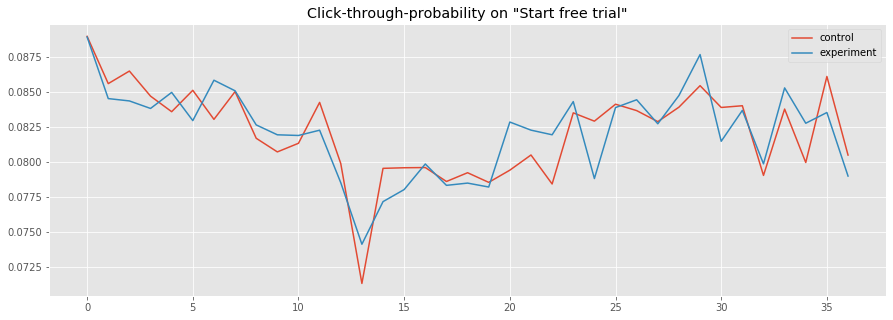

In [35]:
# Plot the metrics
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
csfont = {'fontname':'Arial'}
plt.title('Click-through-probability on "Start free trial"')
line1, = plt.plot(control['Clicks']/control['Pageviews'], label='control')
line2, = plt.plot(exp['Clicks']/exp['Pageviews'], label='experiment')
plt.legend(handles=[line1, line2])

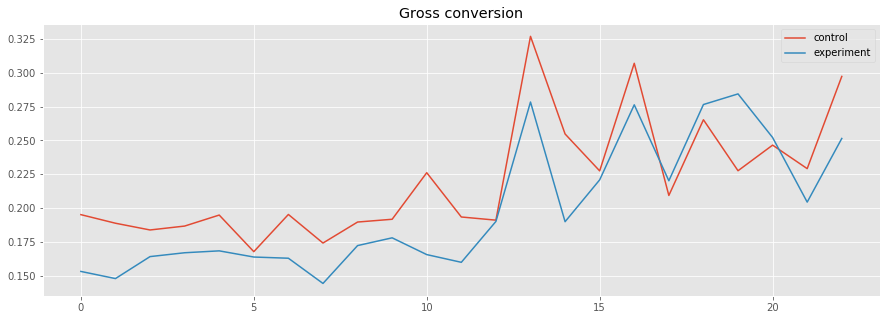

In [36]:
plt.title('Gross conversion')
line3, = plt.plot(control['Enrollments']/control['Clicks'], label='control')
line4, = plt.plot(exp['Enrollments']/exp['Clicks'], label='experiment')
plt.legend(handles=[line3, line4])

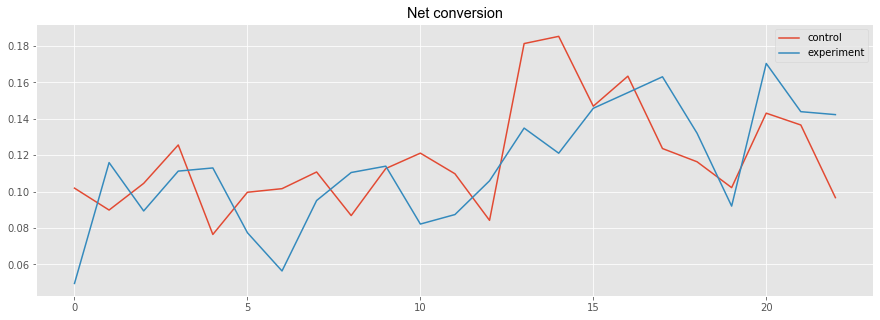

In [37]:
plt.title('Net conversion', **csfont)
line7, = plt.plot(control['Payments']/control['Clicks'], label='control')
line8, = plt.plot(exp['Payments']/exp['Clicks'], label='experiment')
plt.legend(handles=[line7, line8])

### Sanity Check

Start by checking whether your invariant metrics are equivalent between the two groups. If the invariant metric is a simple count that should be randomly split between the 2 groups, you can use a binomial test as demonstrated in Lesson 5. Otherwise, you will need to construct a confidence interval for a difference in proportions using a similar strategy as in Lesson 1, then check whether the difference between group values falls within that confidence level.


If your sanity checks fail, look at the day by day data and see if you can offer any insight into what is causing the problem.



In [39]:
print ("Control group:")
print ("Clicks = ", control['Clicks'].sum(), "   ", \
      "Pageviews = ", control['Pageviews'].sum())
print()
print ("Experimental group:")
print ("Clicks = ", exp['Clicks'].sum(), "   ", \
      "Pageviews = ", exp['Pageviews'].sum())

Control group:
Clicks =  28378     Pageviews =  345543

Experimental group:
Clicks =  28325     Pageviews =  344660


In [41]:
# Supporting calculation for checking invariant metrics
p = 0.5
print ("Number of cookies:")
SE_cookies = math.sqrt(p * p / (345543 + 344660))
print ("Standard error SE = ", SE_cookies)
ME_cookies = SE_cookies * 1.96
print ("Margin of error ME = ", ME_cookies)
(LB_cookies, UB_cookies) = (p - ME_cookies, p + ME_cookies)
print ("Confidential interval CI = ", (LB_cookies, UB_cookies))
print (u'p\u0302', "=", 345543.0 / (345543 + 344660), u'\u2208', (LB_cookies, UB_cookies), u'\u2713')
print()

print ('Number of clicks on “Start free trial":')
SE_clicks = math.sqrt(0.5 * 0.5 / (28378 + 28325))
print ("Standard error SE = ", SE_clicks)
ME_clicks = SE_clicks * 1.96
print ("Margin of error ME = ", ME_clicks)
(LB_clicks, UB_clicks) = (p - ME_clicks, p + ME_clicks)
print ("Confidential interval CI = ", (LB_clicks, UB_clicks))
print (u'p\u0302', "=", 28378.0 / (28378 + 28325), u'\u2208', (LB_clicks, UB_clicks), u'\u2713')
print()

print ('Click-through-probability on "Start free trial":')
p_pool = (28378 + 28325) / (345543 + 344660)
print ("Pooled probability p_pool = ", p_pool)
SE_pool = math.sqrt(p_pool * (1 - p_pool) / (345543 + 344660))
print ("Standard error SE = ", SE_pool)
ME_pool = SE_pool * 1.96
print ("Margin of error ME = ", ME_pool)
d_hat = 28325.0 / 344660 - 28378.0 / 345543
print ("Difference", u'd\u0302', "= ", d_hat)
(LB_pool, UB_pool) = (0 - ME_pool, 0 + ME_pool)
print ("Confidential interval CI = ", (LB_pool, UB_pool))


Number of cookies:
Standard error SE =  0.0006018407402943247
Margin of error ME =  0.0011796078509768765
Confidential interval CI =  (0.49882039214902313, 0.5011796078509769)
p̂ = 0.5006396668806133 ∈ (0.49882039214902313, 0.5011796078509769) ✓

Number of clicks on “Start free trial":
Standard error SE =  0.002099747079699252
Margin of error ME =  0.0041155042762105335
Confidential interval CI =  (0.49588449572378945, 0.5041155042762105)
p̂ = 0.5004673474066628 ∈ (0.49588449572378945, 0.5041155042762105) ✓

Click-through-probability on "Start free trial":
Pooled probability p_pool =  0.08215409089789526
Standard error SE =  0.00033053013733053854
Margin of error ME =  0.0006478390691678556
Difference d̂ =  5.662709158693602e-05
Confidential interval CI =  (-0.0006478390691678556, 0.0006478390691678556)


Since the click through probability Confidence Interval contains 0, we would conclude that the test does not have any significance effect on this metric. For the number of cookies and number of clicks, the fraction is within their confidence interval, therefore, we can conclude that the test is valid for invariant metrics.

Therefore, All invariant metrics have stood the test successfully. This is a very predictable result. Selecting these metrics was based on the lack of experiment influence.

### Check for Practical and Statistical Significance


Next, for your evaluation metrics, calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)


If you have chosen multiple evaluation metrics, you will need to decide whether to use the Bonferroni correction. When deciding, keep in mind the results you are looking for in order to launch the experiment. Will the fact that you have multiple metrics make those results more likely to occur by chance than the alpha level of 0.05?


In [43]:
print ("Control group:")
print ("Clicks = ", control['Clicks'].sum(), "   ", \
"Enrollments = ", control['Enrollments'].sum(), "   ", \
"Payments = ", control['Payments'].sum())
print ("Experimental group:")
print ("Clicks = ", exp['Clicks'].sum(), "   ", \
"Enrollments = ", exp['Enrollments'].sum(), "   ", \
"Payments = ", exp['Payments'].sum())

Control group:
Clicks =  28378     Enrollments =  3785.0     Payments =  2033.0
Experimental group:
Clicks =  28325     Enrollments =  3423.0     Payments =  1945.0


According to the analytic variance approach, we only consider Gross Conversion and Net Conversion for this test

In [46]:
# Supporting calculation for checking evaluation metrics
print ("Gross conversion")
p_pool = (3785.0 + 3423.0) / (17293 + 17260)
print ("Pooled probability p_pool = ", p_pool)
SE_pool = math.sqrt(p_pool * (1 - p_pool) / (17293 + 17260))
print ("Standard error SE = ", SE_pool)
ME_pool = SE_pool * 1.96
print ("Margin of error ME = ", ME_pool)
d = 3423.0 / 17260 - 3785.0 / 17293
print ("Difference d", "= ", d)
(LB_pool, UB_pool) = (d - ME_pool, d + ME_pool)
print ("Confidential interval CI = ", (LB_pool, UB_pool))
print ((-0.01, 0, 0.01), u'\u2209', (LB_pool, UB_pool))
print ("Statistical significance", u'\u2713', "  Practical significance ", u'\u2713')
print()

print ("Net conversion")
p_pool = (2033.0 + 1945.0) / (17293 + 17260)
print ("Pooled probability p_pool = ", p_pool)
SE_pool = math.sqrt(p_pool * (1 - p_pool) / (17293 + 17260))
print ("Standard error SE = ", SE_pool)
ME_pool = SE_pool * 1.96
print ("Margin of error ME = ", ME_pool)
d = (1945.0 / 17260 - 2033.0 / 17293)
print ("Difference d = ", d)
(LB_pool, UB_pool) = (d - ME_pool, d + ME_pool)
print("Confidential interval CI = ", (LB_pool, UB_pool))
print (0, u'\u2209', (LB_pool, UB_pool),  ";  dmin = -0.0075", u'\u2208', (LB_pool, UB_pool))
print ("Statistical significance", u'\u2713', "  Practical significance ", u'\u2718')

Gross conversion
Pooled probability p_pool =  0.20860706740369866
Standard error SE =  0.002185836695729547
Margin of error ME =  0.004284239923629912
Difference d =  -0.020554874580361565
Confidential interval CI =  (-0.024839114503991476, -0.016270634656731654)
(-0.01, 0, 0.01) ∉ (-0.024839114503991476, -0.016270634656731654)
Statistical significance ✓   Practical significance  ✓

Net conversion
Pooled probability p_pool =  0.1151274853124186
Standard error SE =  0.0017170659733726692
Margin of error ME =  0.0033654493078104316
Difference d =  -0.0048737226745441675
Confidential interval CI =  (-0.008239171982354599, -0.001508273366733736)
0 ∉ (-0.008239171982354599, -0.001508273366733736) ;  dmin = -0.0075 ∈ (-0.008239171982354599, -0.001508273366733736)
Statistical significance ✓   Practical significance  ✘


We have measured two metrics in one experiment. Applying the Bonferroni correction means that the a-level for each hypothesis will be 2.5 % instead of 5% and confidential intervals will be significantly wider. It is too conservative for some reasons.

The use of the Bonferroni correction would really be needed if we test several metrics in one experiment and expect that at least one metrics will demonstrate the statistically significant change. In the set of metrics, this matching only for one indicator can be an absolutely random event, therefore the experiment will have a false positive result. It means we should increase the confidential intervals to avoid this situation and apply the Bonferroni correction.

But in the case of our experiment, we expect two metrics will have matched our criteria at the same time to proceed with the launch. It's a very strong condition without any correction. The positive results will be more likely to occur not by chance. Therefore, the Bonferroni correction could be the cause to approve the wrong null hypothesis and we should not use it this time.

Also, our metrics have a strong relationship between each other. If we know the outcome of one test of a difference between the control and experimental groups on one metrics, it would be easy to predict and to find the outcome of the other tests on the other metrics. It's absolutely natural to expect their behavior will be similar simultaneously.

### Run Sign Tests

For each evaluation metric, do a sign test using the day-by-day breakdown. If the sign test does not agree with the confidence interval for the difference, see if you can figure out why.



In [50]:
# Supporting calculation of successful events for the evaluation metrics
control2 = control.dropna()
exp2 = exp.dropna()

Gross_conversion_success = exp2['Enrollments']/exp2['Clicks'] \
>control2['Enrollments']/control2['Clicks']
print ("Gross conversion: success =", Gross_conversion_success.sum(), "  total =", Gross_conversion_success.size)
Net_conversion_success = exp2['Payments']/exp2['Clicks'] \
>control2['Payments']/control2['Clicks']
print ("Net conversion: success =", Net_conversion_success.sum(), "  total =", Net_conversion_success.size)

Gross conversion: success = 4   total = 23
Net conversion: success = 10   total = 23


#### Gross Conversion Sign Test
<img src="gross_conversion_sign_test.png">

#### Net Conversion Sign Test
<img src="net_conversion_sign_test.png">

Eventually, the effective size and sign tests show that the site change would statistically significantly reduce the gross conversion, but did not affect the net conversion in a statistically significant way. The effect size test states this in the practical meaning also.

I did not use the Bonferroni correction for any calculations because it will be too conservative in the case of highly related metrics which should give the expected result simultaneously.

### Recommendation

Finally, make a recommendation. Would you launch this experiment, not launch it, dig deeper, run a follow-up experiment, or is it a judgment call? If you would dig deeper, explain what area you would investigate. If you would run follow-up experiments, briefIy describe that experiment. If it is a judgment call, explain what factors would be relevant to the decision.



My recommendation is to not launch the test since the actual underlying goal we had was not reached (increase fraction of paying users by asking them in advance if they have the time to invest in the course), we can only recommend to not continue with change. It may have caused a change in Gross conversion, but it didn't for net conversion.

- Positive results of the experiment.

 - The difference for the gross conversion is practically significant and negative. This is a good sign: the Udacity team can lower costs by a number of trial signups. 
 - The difference for the net conversion is not statistically significant. It means the absence of serious financial losses.
 
- Negative results of the experiment:

 - The interval for the difference in the case of the net conversion includes negative numbers. Therefore, the team has a risk to decrease incomes.
 - We have not gathered enough data to draw conclusions about the retention and because of this we can not evaluate correctly the difference between the control and experimental groups for a number of students who were disappointed in studying during the free period. Consequently, we do not know enrolled users would be disappointed in the learning process less and make more payments or would not.

### Follow up

Before scheduling the follow-up experiment, I would like to analyze the available data for the evaluation metrics "Retention".



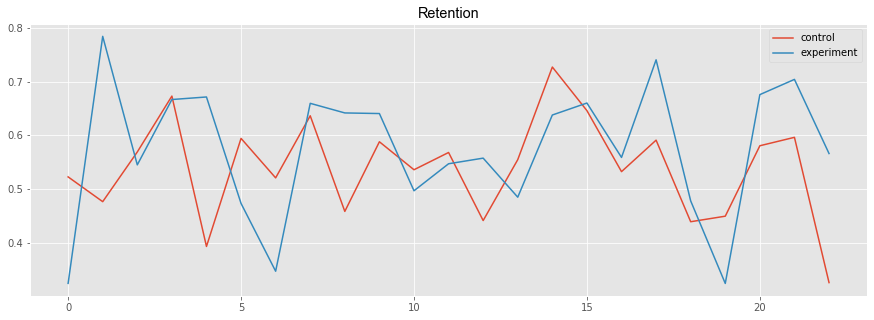

In [51]:
plt.title('Retention', **csfont)
line5, = plt.plot(control2['Payments']/control2['Enrollments'], label='control')
line6, = plt.plot(exp2['Payments']/exp2['Enrollments'], label='experiment')
plt.legend(handles=[line5, line6])

I would suggest these possible changes to the proposed experiment.

- Extend the duration of the experiment up to 2 months with constant monitoring of incomes for avoiding financial risks. If the decline in revenues becomes out of the certain limits, the study should be stopped immediately.
- Measure all three evaluation metrics (the gross conversion, the retention, and the net conversion) for the 100% level of traffic because the audience of this site is very different in education, age, nationality, and other characteristics. Any reduction in the percentage of participants can significantly distort the results.
- Replace the visualization message by the video with an explanation of successful learning strategies based on statistics of the particular site or by the input test for the course level recommendations exactly for this user.
- In order to avoid the negative psychological effect or cut the extremely talented part of the audience which is able to pass the course without spending a lot of time to study, all changes should be only informative and recommendatory.
- Recommendations in the videos or leveled tests should have the most practical character that is suitable for this course.

The length of free trial period is unchanged.
I think the effect will be more detectable.

Now we can begin to define the technical details of the experiment. Selecting the unit of diversion, and invariant and evaluation metrics was quite reasonable. It is easy to obtain measurement results for decision making without the high level of costs or risks. Accordingly, I propose to leave them unchanged.

Unit of diversion: the cookie.
Invariant metrics: the number of cookies, the number of clicks, and the click-through-probability.
Evaluation metrics: the gross conversion, the retention, and the net conversion.
The hypothesizes about the behavior of our metrics are also stayed the same:

the gross conversion should significantly decrease;
the retention should significantly increase;
the net conversion should not decrease.
I expect the overcoming the negative results of the previous experiment and detecting the tendencies for all evaluation metrics.